In [68]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)


In [69]:
!dir ..\output

 �h���C�u D �̃{�����[�� ���x���� �{�����[�� �ł�
 �{�����[�� �V���A���ԍ��� 5C06-DFA8 �ł�

 d:\000_devs\003_kaggle_Rainforest-Connection-Species-Audio-Detection\Rainforest-Connection-Species-Audio-Detection\output �̃f�B���N�g��

2021/02/17  13:34    <DIR>          .
2021/02/17  13:34    <DIR>          ..
2021/02/17  13:34           889,028 submission0888.csv
2021/02/17  12:55           525,494 submission877.csv
2021/02/15  17:41           936,124 submission_exp_35_FocusOnTImeTrivialNoSpec.csv
2021/02/16  09:11           935,938 submission_exp_40_bagging1_spec10.csv
2021/02/16  16:24           939,167 submission_exp_40_bagging1_spec10_min.csv
2021/02/16  22:18           935,561 submission_exp_41_bagging2_spec10_epoch30.csv
2021/02/17  05:35           935,207 submission_exp_42_baggin_spec05_seed19880111_epoch50.csv
2021/02/17  13:01           936,181 submission_time_min_40.csv
               8 �̃t�@�C��           7,032,700 �o�C�g
               2 �̃f�B���N�g��  541,629,784,064 �o�C�g�̋󂫗̈

In [71]:
dfs = []

dfs.append(pd.read_csv(Path("../src/submission_exp_33_relativemixup.csv")).sort_values('recording_id')) # 0.841
# dfs.append(pd.read_csv(Path("../output/submission_exp_40_bagging1_spec10.csv")).sort_values('recording_id')) # 0.848
dfs.append(pd.read_csv(Path("../output/submission_time_min_40.csv")).sort_values('recording_id')) # 0.850
# dfs.append(pd.read_csv(Path("../output/submission877.csv")).sort_values('recording_id')) # 0.877
dfs.append(pd.read_csv(Path("../output/submission0888.csv")).sort_values('recording_id')) # 0.877

for df in dfs:
    display(df.head(1))
    display(df.values[0][1:].sum())
    display()


,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,000316da7,-3.963192,-3.899628,-4.297338,2.585256,-5.078191,-3.294672,-4.095529,-3.663096,-4.851561,-5.001906,-5.466069,-3.913064,-0.925926,-6.174094,-3.428652,-3.318981,-4.905501,-5.708141,-3.00723,-5.088552,-4.152307,-5.766663,-3.572369,-2.122745


-93.11015188694

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
1619,000316da7,-4.385962,-5.209153,-4.866416,2.433722,-5.875193,-3.52861,-4.545398,-3.529104,-5.965879,-4.727323,-5.91406,-4.537738,3.082799,-6.421977,-3.716737,-2.814886,-5.828997,-4.651875,-3.010005,-5.468377,-5.338098,-6.334151,-2.826548,-3.33984


-97.3198037147522

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,000316da7,3.202613,3.895946,1.706396,7.599547,1.076078,5.293725,0.635732,4.540981,1.910178,3.732816,0.085332,2.067787,6.864664,2.676665,5.81584,5.394237,4.205831,1.205558,6.158976,0.611817,2.685329,4.750577,2.779728,4.499254


83.39560815408683

In [72]:
dfs[0].describe()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,-4.537877,-4.629273,-5.113278,-1.128417,-5.704484,-4.299514,-5.582726,-3.258758,-5.191267,-5.477945,-5.250638,-4.645345,-3.892658,-6.176140,-4.120329,-3.532532,-4.999065,-6.172875,-4.220562,-5.537817,-4.846891,-6.075690,-4.974375,-3.435039
std,2.722546,2.412336,2.463886,2.607288,1.802444,2.402121,2.021651,3.104117,2.063515,1.952968,2.325347,2.396845,3.312034,1.691672,3.000369,2.964105,3.335589,2.430703,2.209688,2.094975,2.276029,1.507066,2.421106,2.856488
min,-11.036178,-11.650098,-10.888427,-9.117212,-11.251689,-10.415293,-11.073733,-10.978561,-9.343481,-10.539261,-11.177365,-10.914125,-12.132948,-10.396128,-12.287849,-10.313114,-11.411596,-12.803609,-11.583466,-11.783501,-10.648915,-12.284884,-10.028069,-10.341975
25%,-6.193359,-6.373738,-6.663797,-3.029825,-6.822863,-6.076131,-7.024347,-5.441105,-6.370994,-6.738246,-6.812447,-6.222716,-6.161427,-7.195206,-5.876361,-5.274116,-6.886953,-7.840858,-5.834421,-7.014569,-6.548967,-7.038612,-6.428510,-5.256020
50%,-5.063223,-4.701808,-5.590758,-0.995502,-5.816640,-4.744503,-5.665044,-3.491224,-5.467676,-5.774160,-5.438485,-4.771247,-4.506641,-6.301697,-4.539920,-4.086844,-5.490199,-6.022786,-4.241165,-5.510921,-4.723903,-6.111915,-5.224559,-3.839067
75%,-3.772609,-3.125759,-4.126081,0.883423,-4.725081,-2.911341,-4.250226,-1.799709,-4.496050,-4.528686,-3.900772,-3.271303,-2.627147,-5.367350,-2.902947,-2.866250,-3.960574,-4.638663,-2.828110,-4.181040,-3.208453,-5.140802,-3.887757,-2.388320
max,7.698174,5.559178,8.176502,5.008687,6.194313,5.152053,10.953040,5.329361,12.006584,6.672544,10.766059,4.899692,8.338151,8.138064,7.860230,8.857271,11.782540,6.783482,5.594835,19.213860,12.685606,1.664674,17.508442,12.648260


In [73]:
dfs[1].describe()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,-5.118227,-5.829824,-5.207319,-1.071227,-6.724855,-5.202419,-6.567163,-3.018345,-6.252657,-5.642111,-6.044493,-5.195903,-2.939373,-6.730776,-5.280562,-4.170498,-5.647015,-5.473116,-4.629457,-6.393554,-6.097198,-6.640199,-5.595734,-4.313977
std,3.419840,2.925900,3.038614,3.351818,2.121465,2.751194,2.559799,3.784110,2.164022,2.312574,3.048506,3.334697,4.668886,2.207496,4.032497,3.674381,4.099059,3.158218,2.741360,2.312079,2.928439,2.507844,2.684428,3.550036
min,-17.340582,-18.960884,-17.190350,-12.547818,-18.873280,-15.787035,-15.311708,-12.804800,-15.231890,-12.307665,-13.599010,-16.178802,-13.433212,-12.268753,-19.660601,-16.007311,-14.396373,-13.729673,-18.499233,-13.237264,-16.321142,-21.061148,-12.099381,-13.285869
25%,-7.221991,-7.683676,-7.082575,-3.519948,-8.098500,-7.138848,-8.252347,-5.570544,-7.547354,-7.117939,-8.008746,-7.546212,-6.081864,-7.914344,-7.706944,-6.393636,-7.974918,-7.458007,-6.488504,-7.848229,-8.167117,-7.997324,-7.106640,-6.484823
50%,-5.637382,-5.608434,-5.536994,-0.860549,-6.780501,-5.544887,-6.511837,-3.101537,-6.361882,-5.734802,-6.195660,-5.300442,-4.145983,-6.777402,-5.446982,-4.737489,-6.028495,-5.336079,-4.611562,-6.246437,-5.917900,-6.430328,-5.813923,-4.692477
75%,-3.724272,-4.046327,-3.934595,1.551221,-5.461817,-3.448828,-4.711454,-1.109416,-5.139829,-4.212046,-4.283902,-2.989275,-1.529301,-5.809322,-2.983024,-3.266332,-4.245712,-3.915061,-2.955116,-4.852932,-3.945721,-5.032031,-4.471053,-3.063674
max,11.077141,6.011437,10.137071,6.735675,7.216008,5.123929,12.711205,7.928565,7.698490,7.788985,14.327687,7.304060,13.828547,14.959384,10.218735,14.931409,16.356571,12.920204,5.943083,23.032665,13.324265,4.560400,17.312244,16.319836


In [74]:
dfs[2].describe()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,2.815473,4.155829,2.249358,6.754669,2.132679,4.044692,1.968490,5.349833,2.836980,2.982636,2.198528,3.698048,4.486150,2.255985,4.222967,4.042854,3.987631,2.735229,3.977959,1.982516,3.274497,3.499670,3.187648,4.152071
std,2.080910,1.463357,1.861200,0.562690,1.800271,1.724558,1.580888,1.487028,1.707525,1.399848,1.790945,1.810664,2.043847,1.693605,1.665204,1.791396,1.948224,1.889666,1.994345,1.432799,1.849606,1.817914,1.540429,1.626411
min,0.053680,0.163017,0.013161,3.956336,0.032959,0.059696,0.022024,0.663757,0.071125,0.236491,0.032835,0.055346,0.090018,0.052654,0.050007,0.123630,0.036777,0.019797,0.072210,0.029730,0.053790,0.067185,0.040816,0.016096
25%,1.130665,3.056275,0.724785,6.402289,0.615066,2.797827,0.602785,4.459357,1.470600,1.886172,0.629297,2.196740,2.750151,0.796741,3.194138,2.717180,2.541515,0.948790,2.231287,0.814444,1.617107,1.917307,2.038252,3.018199
50%,2.221237,4.124058,1.785695,6.842074,1.530279,4.189787,1.633128,5.591680,2.461860,2.769373,1.735908,3.650394,4.526791,1.821905,4.357612,3.772226,4.173042,2.615729,4.293895,1.681120,3.263476,3.752477,3.111163,4.187333
75%,4.293682,5.220382,3.410348,7.188098,3.522132,5.369012,3.040067,6.426360,4.117230,3.904798,3.483473,5.051062,6.184240,3.542663,5.251486,5.188339,5.469797,4.264233,5.829018,2.891271,4.964831,5.129562,4.254994,5.265110
max,7.968115,7.591943,8.058407,7.732320,7.542812,7.869530,7.547566,7.951008,7.692734,7.505998,7.704835,7.853455,8.125907,7.490641,8.060453,8.083069,8.159896,7.895122,7.622114,7.487210,7.721523,7.240556,7.730002,8.183586


In [75]:
dfs[3].describe()

IndexError: list index out of range

In [76]:
dfs[4].describe()

IndexError: list index out of range

In [77]:
def generate(main, support, coeff):
    g1 = main.copy()
    g2 = main.copy()
    g3 = main.copy()
    g4 = main.copy()
    
    for i in main.columns[1:]:
        lm, Is = [], []                
        lm = main[i].tolist()
        ls = support[i].tolist() 
        
        res1, res2, res3, res4 = [], [], [], []          
        for j in range(len(main)):
            res1.append(max(lm[j] , ls[j]))
            res2.append(min(lm[j] , ls[j]))
            res3.append((lm[j] + ls[j]) / 2)
            res4.append((lm[j] * coeff) + (ls[j] * (1.- coeff)))
            
        g1[i] = res1
        g2[i] = res2
        g3[i] = res3
        g4[i] = res4
        
    return g1,g2,g3,g4

In [78]:
def drawing(main, support, generated, column_number):
    
    X  = main.iloc[:, column_number]
    Y1 = support.iloc[:, column_number]
    Y2 = generated.iloc[:, column_number]
    
    # plt.style.use('seaborn-whitegrid') 
    # plt.figure(figsize=(8, 8), facecolor='lightgray')
    # plt.title(f'\nOn the X axis >>> main\n\nOn the Y axis >>> support\n')           
    # plt.scatter(X, Y1, s=3)
    # plt.show() 
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nOn the X axis >>> main\n\nOn the Y axis >>> generated\n')           
    plt.scatter(X, Y2, s=3)
    plt.show() 

In [79]:
a1,a2,a3,a4 = generate(dfs[1], dfs[0], 0.80)

max


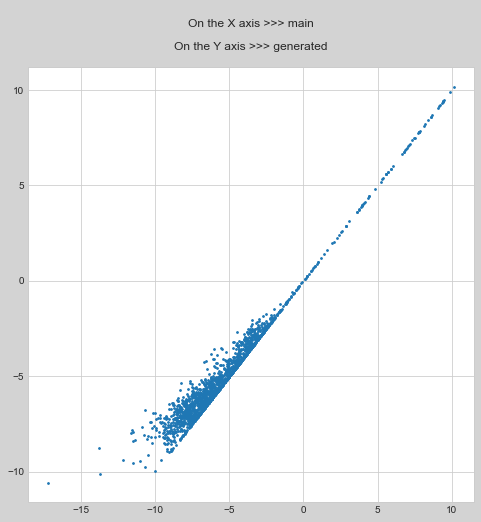

min


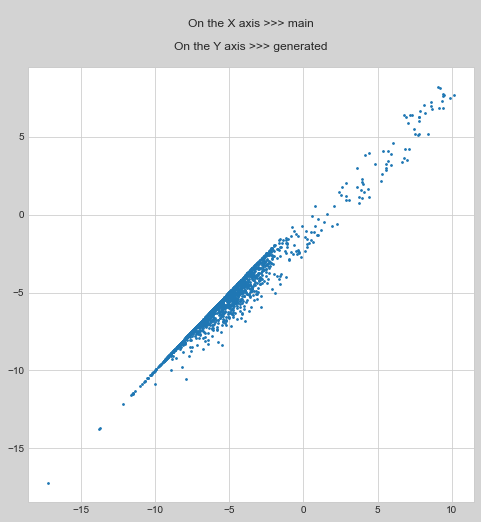

avg


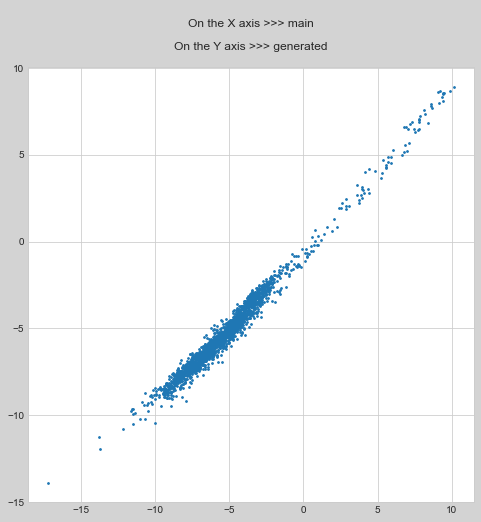

coeff


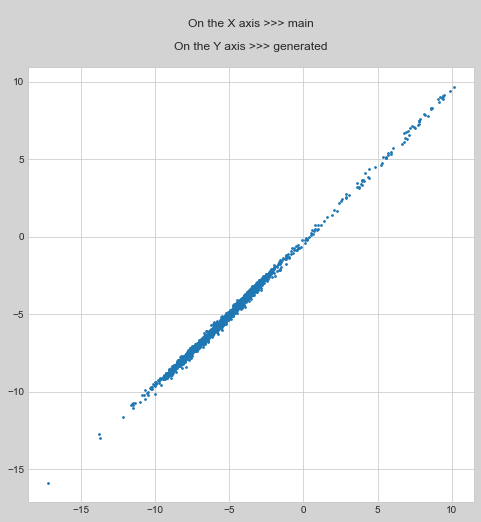

In [80]:
print("max")
drawing(dfs[1], dfs[0], a1, 3)
print("min")
drawing(dfs[1], dfs[0], a2, 3)
print("avg")
drawing(dfs[1], dfs[0], a3, 3)
print("coeff")
drawing(dfs[1], dfs[0], a4, 3)

In [81]:
bagging = a4

In [83]:
bagging.describe()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,-5.002157,-5.589714,-5.188511,-1.082665,-6.520781,-5.021838,-6.370276,-3.066428,-6.040379,-5.609278,-5.885722,-5.085792,-3.130030,-6.619849,-5.048516,-4.042905,-5.517425,-5.613067,-4.547678,-6.222407,-5.847137,-6.527297,-5.471463,-4.138190
std,3.253368,2.782411,2.902492,3.137937,2.006864,2.656149,2.419738,3.622459,2.088279,2.187053,2.881540,3.115020,4.366649,2.066354,3.793329,3.515075,3.926370,2.977647,2.559599,2.249834,2.775301,2.257678,2.609205,3.389625
min,-15.837086,-17.474124,-15.866851,-11.804604,-17.348961,-14.475757,-14.149331,-12.280693,-13.713880,-11.454715,-13.114681,-14.700885,-12.509203,-11.694168,-18.144475,-14.868472,-13.673229,-13.516922,-17.020118,-12.640076,-14.688089,-19.305895,-11.371105,-12.697090
25%,-7.027185,-7.432922,-6.992559,-3.406208,-7.801346,-6.931602,-7.984116,-5.508858,-7.261505,-7.005172,-7.753192,-7.287730,-6.082058,-7.738004,-7.320018,-6.185759,-7.768404,-7.542241,-6.278993,-7.669407,-7.867106,-7.798148,-6.952408,-6.225347
50%,-5.530805,-5.425341,-5.584489,-0.903751,-6.556012,-5.375824,-6.365518,-3.175779,-6.197849,-5.758143,-6.024028,-5.201459,-4.182300,-6.692135,-5.273014,-4.602066,-5.881213,-5.459252,-4.566470,-6.089489,-5.660063,-6.407408,-5.711341,-4.533399
75%,-3.755896,-3.919488,-3.987617,1.395028,-5.359797,-3.326342,-4.642097,-1.304333,-5.047454,-4.350554,-4.200175,-3.038170,-1.808519,-5.762509,-2.991161,-3.181101,-4.232731,-4.108265,-2.947588,-4.719595,-3.804807,-5.066299,-4.404720,-2.924340
max,10.233230,5.727538,9.638458,6.145795,7.011669,5.101553,12.359572,7.295838,8.560109,7.461131,13.494358,6.823186,12.730468,13.506887,9.747034,13.716581,15.235646,11.692860,5.873434,22.268904,13.196533,3.942494,17.351484,15.125514


In [84]:
b1,b2,b3,b4 = generate(dfs[2], bagging, 0.8)

max


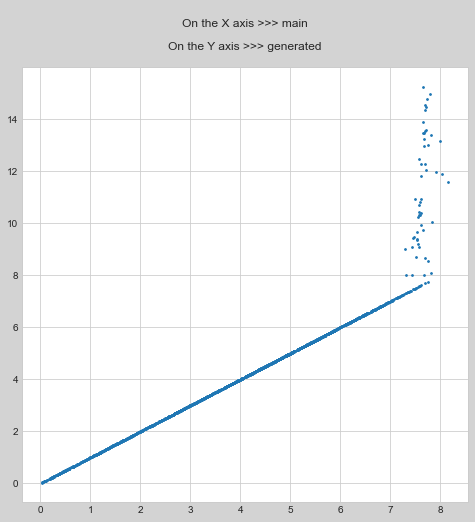

min


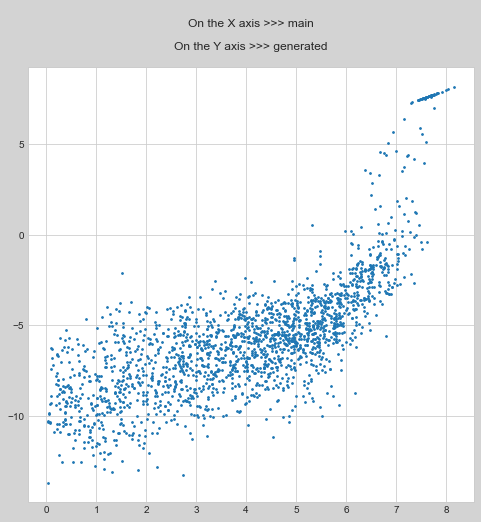

avg


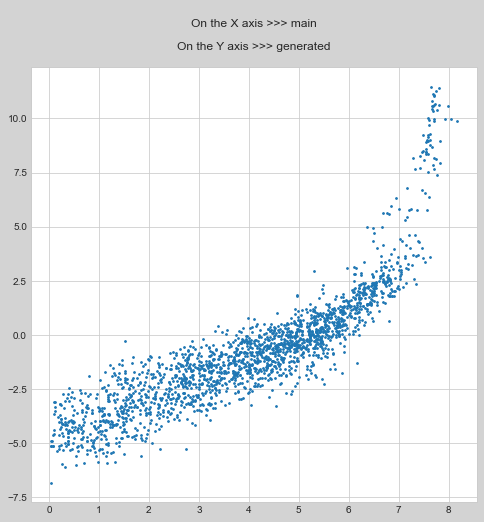

coeff


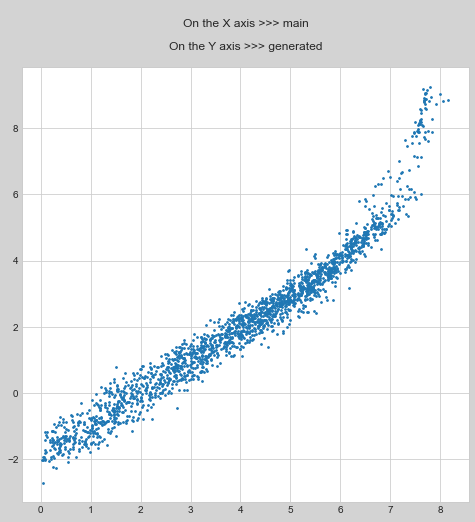

In [86]:
print("max")
drawing(dfs[2], bagging, b1, 17)
print("min")
drawing(dfs[2], bagging, b2, 17)
print("avg")
drawing(dfs[2], bagging, b3, 17)
print("coeff")
drawing(dfs[2], bagging, b4, 17)

In [87]:
df_sub = b4

In [88]:
df_sub

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,000316da7,1.701809,2.127308,0.414597,6.572444,-0.282296,3.538616,-0.382499,2.921604,0.379540,2.029805,-1.096627,0.771669,5.947942,0.866852,3.920848,3.732249,2.235805,-0.008180,4.325291,-0.589029,1.128075,2.556331,1.628640,2.980119
1,003bc2cb2,1.597907,3.195884,0.970001,5.390568,0.584575,-0.534160,-0.826898,4.264119,-0.047675,0.625305,1.207479,1.394711,2.948283,-0.513774,2.936608,3.644753,8.913202,2.764329,3.323105,-1.410641,-0.819434,1.131757,0.311647,-0.000087
2,0061c037e,3.057132,2.581748,-0.201695,4.996759,-0.908086,2.666109,0.408568,6.194627,-0.296650,-0.061606,4.110716,1.157006,-0.416956,0.828592,2.566200,1.316932,3.550989,3.574817,1.177349,2.496640,2.935646,1.139117,3.334534,3.520678
3,010eb14d3,6.914435,1.204298,-0.017898,1.925567,2.832704,2.353185,-1.207551,1.492560,5.440270,2.283765,0.324112,-1.392711,1.905855,-0.038796,1.667793,1.071425,-0.798762,-2.319466,4.135705,-0.747928,-0.265674,2.910290,-0.924026,0.681280
4,011318064,0.172533,1.035858,2.414637,5.168548,0.755420,1.285443,0.456028,3.057205,1.615587,0.852147,-1.299418,1.677392,0.387051,1.663430,6.392419,5.722903,3.352569,2.453682,4.741635,-1.188883,-0.317450,2.864895,-0.526141,-0.521478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,ff68f3ac3,3.372712,-0.896855,-0.353866,3.553263,1.989578,5.866015,0.017530,3.665538,1.813785,-0.027297,-1.192146,0.119949,3.345559,2.219133,-0.183552,5.661186,1.208228,1.086262,-1.034495,0.764682,3.669926,1.638574,0.951860,8.436722
1988,ff973e852,-0.433080,0.380720,-1.261300,4.808438,0.146897,1.986388,0.199266,6.685187,0.115124,3.592028,2.797380,3.425398,-0.759064,-1.337880,2.271341,4.809622,1.359361,4.651299,1.262236,1.247385,3.305561,-0.614883,2.357034,3.177731
1989,ffa5cf6d6,1.489422,1.891193,-0.533253,6.457148,-1.044794,2.110475,0.386061,4.486046,0.246916,3.145972,-0.414245,1.884626,3.600366,-0.596119,2.879330,7.644768,2.744823,4.467315,0.778603,-0.167051,3.358484,0.377200,1.753442,1.667955
1990,ffa88cbb8,2.898193,4.025328,2.485507,6.275806,-0.300501,1.452277,-1.406388,5.803423,0.893076,3.092393,-1.109926,-0.397732,2.657567,1.372008,2.131037,0.396649,4.887504,0.680723,0.790101,-0.686190,0.335360,2.317607,0.055435,3.162444


In [89]:
df_sub.to_csv('submission_bagging.csv', index=False)